# BUDS Report 09.5: Putting It All Together

### Table of Contents

1. <a href='#section 1'>An Actual Last Look at the CES Data</a>

2. <a href='#section 2'>You've Done a Lot!</a>

In [1]:
# run this cell

from datascience import *
import numpy as np
import math
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline

## 1. An Actual Last Look at the CES Data <a id='section 1'></a>

Run the next cell so that we can load the CalEnviroScreen dataset one last time.

In [2]:
ces_data = Table.read_table("ces_data_v2.csv")

# this does a bit of data cleaning
# don't worry about understanding these next few lines of code
for i in np.arange(ces_data.num_columns):
    if i != 3 and i != 11:
        ces_data = ces_data.where(i, are.above_or_equal_to(0))
ces_data

Census.Tract,CES.3.0.Score,Total.Population,California.County,Hispanic....,White....,African.American....,Native.American....,Asian.American....,Other....,ZIP,Longitude,Latitude,Ozone,PM2.5,Diesel.PM,Drinking.Water,Pesticides,Tox..Release,Traffic,Cleanup.Sites,Groundwater.Threats,Haz..Waste,Imp..Water.Bodies,Solid.Waste,Pollution.Burden,Asthma,Low.Birth.Weight,Poverty,Unemployment
6019001100,94.09,3174,Fresno,65.3,4.2,24.6,0.5,3.5,1.8,93706,-119.782,36.7097,0.065,15.4,48.524,681.2,2.75,18552,909.14,80.5,45.75,0.795,0,21.75,79.96,131.64,7.44,76.3,17.6
6071001600,90.68,6133,San Bernardino,91.1,5.8,0.7,0.3,1.4,0.7,91761,-117.618,34.0578,0.062,13.31,38.556,904.66,1.37,7494.24,782.26,66.2,36,1.25,5,12,81.19,60.66,7.04,72.5,12.3
6019000200,85.97,3167,Fresno,63.6,5.3,18.9,0.6,9.8,1.8,93706,-119.806,36.7355,0.062,15.4,47.445,681.2,3.03,12454.9,576.52,22,30.25,0.2,0,2.5,71.16,142.12,10.16,86.8,16.1
6077000801,82.49,6692,San Joaquin,57.4,6,12.5,0.3,20.9,2.8,95203,-121.315,37.9405,0.046,12.54,24.117,278.76,12.93,2387.78,1305.01,50.1,132.1,0.795,19,27,74.48,142.17,6.23,61.3,19.6
6019001500,82.03,2206,Fresno,71.8,21.4,1.2,0.5,4.5,0.6,93725,-119.718,36.6816,0.065,15.4,18.846,1000.24,3518.41,21790.7,435.16,60,54.2,13.1,0,50.8,80.2,90.48,4.5,66.4,18.6
6037204920,80.73,2598,Los Angeles,98.1,1.2,0.1,0.1,0.2,0.3,90023,-118.197,34.0175,0.046,12.89,56.52,714.48,0,39040.2,2943.44,36.7,25,4.93,7,3.85,76.73,68.74,7.35,66.4,11.6
6077000300,80.18,2396,San Joaquin,51.8,16.4,16.4,1.3,9.9,4.1,95203,-121.302,37.9524,0.046,13.44,21.76,278.76,172.49,707.536,885.52,89.7,149.05,0.135,14,2.3,68.27,169.56,8.36,76.2,14.4
6019001000,80.13,4106,Fresno,52.7,2.7,28.7,0.4,14.3,1.2,93706,-119.804,36.6978,0.065,15.4,20.848,788.02,1435.93,6996.96,243.54,15.45,20,0,0,10,66.88,142.28,7.83,74.5,20
6037206050,79.03,2146,Los Angeles,79.3,8.9,4.1,0.1,7.2,0.5,90023,-118.224,34.0299,0.046,12.89,53.958,664.07,0,10378.2,2810.82,36.05,16.25,10.025,7,22.1,77.09,58.03,6.71,75.7,28.5
6019000400,78.53,6343,Fresno,78,9.1,5.8,0.8,5.3,0.9,93721,-119.776,36.7277,0.065,15.4,54.356,681.2,114.96,125384,815.36,15.95,13.5,0.755,0,0.5,73.89,107.8,4.79,83.4,23.5


It might make sense that counties that are inland feel the effects of pollution more so than those that are on the coast. The Central Valley doesn't have as much air circulation as the coast and many pesticides are used there. Let's examine this possibility by comparing the most populated Central Valley counties with the Central Coast counties.

<div class="alert alert-warning">
    <b>PRACTICE:</b> First, let's create a table called <code>central_coast</code> that contains some of the Central Coast counties. Similarly, we'll create another table called <code>central_valley</code> with a few Central Valley counties.
    
Use the following counties for these tables.
<ul>
    <li><b>Central Coast:</b> Ventura, Santa Barbara, San Luis Obispo, Monterey, San Benito, and Santa Cruz
    <li><b>Central Valley:</b> Kern, Fresno, Sacramento, and Shasta
    </ul>

Make arrays containing these counties and assign them to the corresponding names. You can use these arrays in your <code>where</code> predicate.
    
Be sure to find a predicate that allows you to keep any row whose county is <i>contained</i> in the corresponding array.
    </div>

In [ ]:
central_coast_counties = make_array(...)
central_coast = ces_data.where(...)
central_coast

In [ ]:
central_valley_counties = ...
central_valley = ...
central_valley

In [3]:
# SOLUTION
central_coast_counties = make_array("Ventura ", "Santa Barbara", "San Luis Obispo", "Monterey ", "San Benito", "Santa Cruz")
central_coast = ces_data.where("California.County", are.contained_in(central_coast_counties))
central_coast

Census.Tract,CES.3.0.Score,Total.Population,California.County,Hispanic....,White....,African.American....,Native.American....,Asian.American....,Other....,ZIP,Longitude,Latitude,Ozone,PM2.5,Diesel.PM,Drinking.Water,Pesticides,Tox..Release,Traffic,Cleanup.Sites,Groundwater.Threats,Haz..Waste,Imp..Water.Bodies,Solid.Waste,Pollution.Burden,Asthma,Low.Birth.Weight,Poverty,Unemployment
6111004902,58.75,5091,Ventura,95.8,1.5,1.2,0.1,0.9,0.5,93030,-119.134,34.2084,0.044,9.5363,13.663,598.95,33324.2,158.187,1017.34,0,12.3,1.205,16,10.25,58.86,116.73,4.69,73,7.8
6111009100,57.83,5279,Ventura,93,3.6,2.1,0.1,0.8,0.4,93030,-119.167,34.1929,0.044,9.5363,13.254,285.13,7457.26,289.164,540.26,11,60.5,0.45,0,10,52.52,113.9,5.59,66.7,17.5
6111002905,50.56,5478,Ventura,55.5,25.1,5.4,0.3,11.3,2.5,93030,-119.232,34.2099,0.044,9.5363,9.781,646.46,39872.8,140.573,570.89,33,53.2,0.525,12,6,62.11,97.99,6.8,23.6,5.4
6111004715,45.27,5020,Ventura,73.6,12.4,3,0.2,9,1.9,93033,-119.149,34.1409,0.044,9.5363,18.358,738.29,35420.6,4139.37,359.96,51.4,43.75,0.27,9,13,68.14,32.43,4.98,48.1,10.6
6087110400,44.98,7976,Santa Cruz,82.2,11.7,0.6,0.2,4.5,0.9,95076,-121.77,36.9044,0.038,5.76369,18.475,627.23,23305.5,0.956527,547.75,47.7,65.5,0.85,14,6.6,58.07,62.41,3.55,46.5,9.6
6053010101,44.8,4518,Monterey,87.9,8.9,0.3,0.3,1.8,0.8,95039,-121.782,36.8633,0.038,5.34451,6.238,860.35,52641.1,0.893057,490.42,19.6,42.05,0.175,19,0.5,48.96,58.43,5.06,70.5,15.2
6111003201,43.71,4577,Ventura,97.1,1.8,0.7,0.1,0,0.3,93030,-119.173,34.2035,0.044,9.5363,13.245,285.13,135.86,247.5,650.96,0.4,5,0.1,0,1,37.68,116.82,5.57,69.1,14.4
6053000900,43.56,5746,Monterey,93.1,3.9,0.5,0.1,1.6,0.8,93905,-121.626,36.6691,0.033,5.34451,12.42,827.31,1179.52,0.779061,668.1,4.65,27.75,0.4,15,1.25,48.99,72.45,3.9,68.7,13.9
6111004704,42.68,1469,Ventura,82.3,13.7,1.2,0.1,1.3,1.4,93033,-119.119,34.1713,0.044,9.5363,12.357,758.07,78963.8,436.69,508.98,4,18,0.36,16,4.05,59.6,33.31,4.73,46.5,10.1
6111002300,41.78,7430,Ventura,70.7,24.2,1.4,0.5,1.6,1.6,93001,-119.3,34.2907,0.046,9.5363,10.044,345.7,7273.27,31.6496,608.72,22.4,43.75,2.3,3,1,52.64,52.88,4.33,53.9,10.1


In [4]:
# SOLUTION
central_valley_counties = make_array("Kern ", "Fresno ", "Sacramento ", "Shasta ")
central_valley = ces_data.where("California.County", are.contained_in(central_valley_counties))
central_valley

Census.Tract,CES.3.0.Score,Total.Population,California.County,Hispanic....,White....,African.American....,Native.American....,Asian.American....,Other....,ZIP,Longitude,Latitude,Ozone,PM2.5,Diesel.PM,Drinking.Water,Pesticides,Tox..Release,Traffic,Cleanup.Sites,Groundwater.Threats,Haz..Waste,Imp..Water.Bodies,Solid.Waste,Pollution.Burden,Asthma,Low.Birth.Weight,Poverty,Unemployment
6019001100,94.09,3174,Fresno,65.3,4.2,24.6,0.5,3.5,1.8,93706,-119.782,36.7097,0.065,15.4,48.524,681.2,2.75,18552,909.14,80.5,45.75,0.795,0,21.75,79.96,131.64,7.44,76.3,17.6
6019000200,85.97,3167,Fresno,63.6,5.3,18.9,0.6,9.8,1.8,93706,-119.806,36.7355,0.062,15.4,47.445,681.2,3.03,12454.9,576.52,22,30.25,0.2,0,2.5,71.16,142.12,10.16,86.8,16.1
6019001500,82.03,2206,Fresno,71.8,21.4,1.2,0.5,4.5,0.6,93725,-119.718,36.6816,0.065,15.4,18.846,1000.24,3518.41,21790.7,435.16,60,54.2,13.1,0,50.8,80.2,90.48,4.5,66.4,18.6
6019001000,80.13,4106,Fresno,52.7,2.7,28.7,0.4,14.3,1.2,93706,-119.804,36.6978,0.065,15.4,20.848,788.02,1435.93,6996.96,243.54,15.45,20,0,0,10,66.88,142.28,7.83,74.5,20
6019000400,78.53,6343,Fresno,78,9.1,5.8,0.8,5.3,0.9,93721,-119.776,36.7277,0.065,15.4,54.356,681.2,114.96,125384,815.36,15.95,13.5,0.755,0,0.5,73.89,107.8,4.79,83.4,23.5
6029002500,78.41,9122,Kern,76.7,5.1,15.9,0.7,0.4,1.2,93307,-118.992,35.3373,0.065,19.18,20.42,1041.62,3.47,49.7082,675.16,42.4,46.25,10.26,0,13.6,70.64,89.83,6.28,73.8,28.5
6019000600,78.41,6161,Fresno,70.8,15.2,6.8,0.7,4.4,2.2,93721,-119.793,36.7431,0.065,15.4,54.243,681.2,88.58,7030.45,591.37,5.7,8,0.46,0,1.25,68.31,118.86,7.87,89.5,21.7
6019001201,78.05,5936,Fresno,83.1,5.1,3.7,0.7,6.6,0.8,93725,-119.758,36.7108,0.065,15.4,27.565,681.2,0,19782.6,347.88,98.65,71.8,4.275,0,20,70.73,89.51,5.28,70.7,20.1
6019000902,77.65,5252,Fresno,57.9,1.5,21.3,0.3,17.7,1.3,93706,-119.804,36.7178,0.065,15.4,47.943,681.2,683.81,25476.6,170.75,12.1,3,0.01,0,4.25,64.75,142.28,9.24,77.5,21.8
6019001202,77.41,4756,Fresno,72.5,2.5,11.7,0.4,12.3,0.6,93725,-119.741,36.7027,0.065,15.4,27.699,947.44,11.74,8837.27,291.45,30.5,38.25,4.28,0,23,75.94,78.61,4.94,77.8,21.6


As usual, we don't really want all of the columns in this table. We're primarily interested in the CES score (or maybe the pollution burden) of these tracts but not much else.

<div class="alert alert-warning">
    <b>PRACTICE:</b> Select the column(s) that we might need in our analysis and assign this table back to <code>central_coast</code> or <code>central_valley</code>. We won't be using the county column, but retain that column as well. It might help us keep track of the Central Coast/Central Valley data a bit.
    </div>

In [ ]:
central_coast = ...
central_coast

In [ ]:
central_valley = ...
central_valley

In [5]:
# SOLUTION
central_coast = central_coast.select("CES.3.0.Score", "California.County")
central_coast

CES.3.0.Score,California.County
58.75,Ventura
57.83,Ventura
50.56,Ventura
45.27,Ventura
44.98,Santa Cruz
44.8,Monterey
43.71,Ventura
43.56,Monterey
42.68,Ventura
41.78,Ventura


In [6]:
# SOLUTION
central_valley = central_valley.select("CES.3.0.Score", "California.County")
central_valley

CES.3.0.Score,California.County
94.09,Fresno
85.97,Fresno
82.03,Fresno
80.13,Fresno
78.53,Fresno
78.41,Kern
78.41,Fresno
78.05,Fresno
77.65,Fresno
77.41,Fresno


In Report 09 section 4, we added a column with only the string "female" to the table of female data, `fem_str`. Similarly, we added a column with only the string "male" to the table of male data, `male_str`.

<div class="alert alert-warning">
    <b>PRACTICE:</b> Look at the code in this section and try to add a column called "Location" with only the string "Central Coast" for the <code>central_coast</code> table and with only the string "Central Valley" for the <code>central_valley</code> table.
    </div>

In [ ]:
central_coast = ...
central_valley = ...
central = central_coast.with_rows(central_valley.rows)
central

In [7]:
# SOLUTION
central_coast = central_coast.with_column("Location", "Central Coast")
central_valley = central_valley.with_column("Location", "Central Valley")
central = central_coast.with_rows(central_valley.rows)
central

CES.3.0.Score,California.County,Location
58.75,Ventura,Central Coast
57.83,Ventura,Central Coast
50.56,Ventura,Central Coast
45.27,Ventura,Central Coast
44.98,Santa Cruz,Central Coast
44.8,Monterey,Central Coast
43.71,Ventura,Central Coast
43.56,Monterey,Central Coast
42.68,Ventura,Central Coast
41.78,Ventura,Central Coast


Finally, let's take a look at the difference between the two categories by visualizing the distribution of CES scores (or pollution burden scores) for the Central Coast and Central Valley. Because we want to compare these two categories, we need to find a way to group the Central Coast data together and separate it from the Central Valley data.

<div class="alert alert-warning">
    <b>PRACTICE:</b> Look back at the BUDS reference sheet and take a look at the documentation notes on <code>hist</code>. Do you see any arguments that might distinguish between these two groups for us? Think about how our table is set up.
    
Don't forget to use the argument <code>normed=False</code>!
    </div>

In [ ]:
central.hist(...)

/opt/conda/lib/python3.9/site-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array(tuple(values))


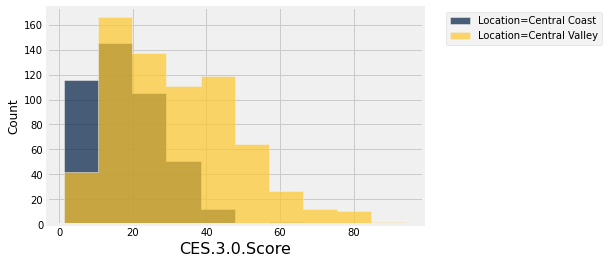

In [8]:
# SOLUTION
central.hist("CES.3.0.Score", group="Location", normed=False)

What do you notice about this histogram? Do you think it agrees with what you expected?

_Written Answer:_

## 2. You've Done a Lot ! <a id='section 2'></a>

Congratulations on combining a multitude of function/method calls on the CalEnviroScreen dataset! You've conducted so much research on pollution and the CalEnviroScreen data, explored many of its different characteristics, and successfully answered a number of questions about the data.

Given that it's only been *two weeks* since this program has started, you have accomplished so much. We're very proud of you!

If you want to explore the data more, feel free to play around more with the dataset in the following cells. Otherwise -- great job!

### Downloading as PDF

Download this notebook as a pdf by clicking <b><code>File > Download as > PDF via LaTeX</code></b>. Turn in the PDF into bCourses under the corresponding assignment.